<a href="https://colab.research.google.com/github/astridyusiang-pixel/Mini-Projects/blob/main/Heart_Disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-prediction


In [3]:
import pandas as pd          # for data handling
import matplotlib.pyplot as plt  # for plots
import seaborn as sns        # nicer plots
from sklearn.model_selection import train_test_split  # split data
from sklearn.ensemble import RandomForestClassifier   # ML model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
from google.colab import files
uploaded = files.upload()




Saving heart.csv to heart.csv


In [5]:
df = pd.read_csv("heart.csv")
df.head()  # preview first 5 rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])



In [8]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [10]:
df.columns



Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Separate features and target
X = df.drop("HeartDisease", axis=1)  # all columns except target
y = df["HeartDisease"]               # target column

# Convert categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
print("Accuracy:", round(accuracy_score(y_test, predictions),2))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.88
Confusion Matrix:
 [[66 11]
 [12 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



/tmp/ipython-input-2449942958.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


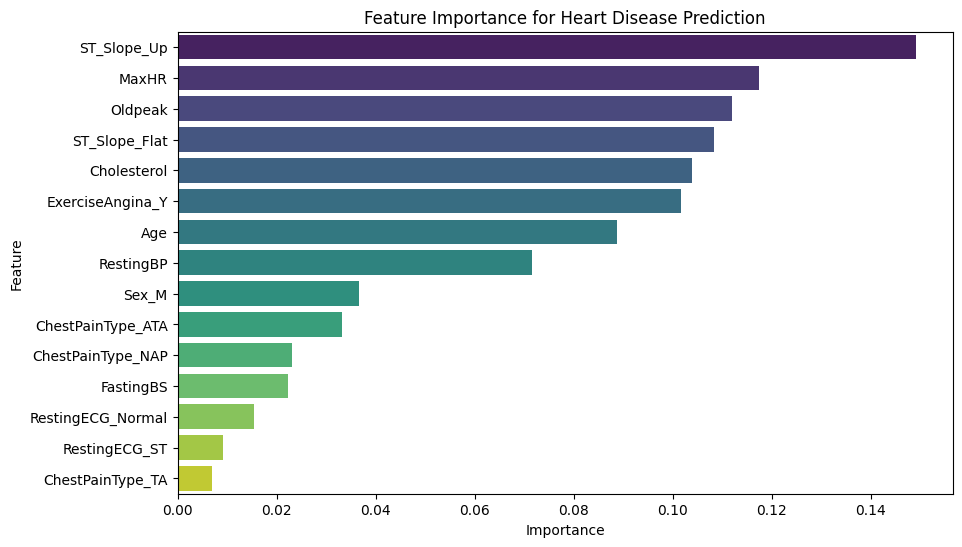

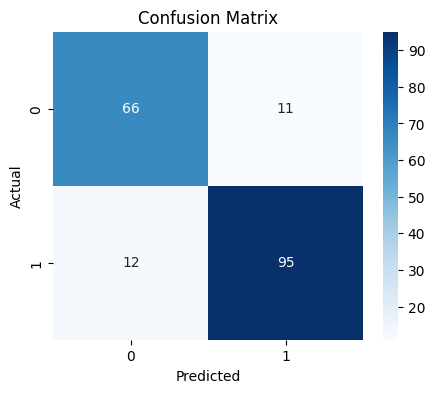

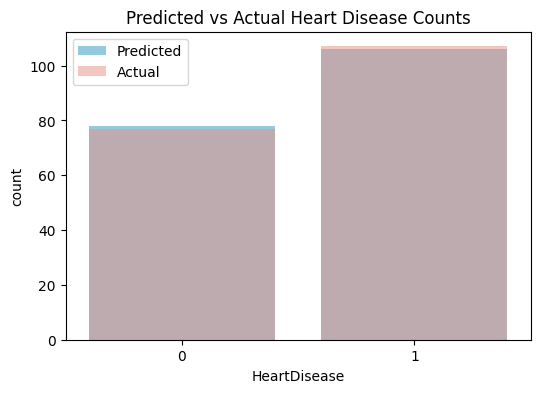

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Importance (Random Forest)
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance for Heart Disease Prediction')
plt.show()


# 2. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 3. Distribution of Predicted vs Actual
plt.figure(figsize=(6,4))
sns.countplot(x=predictions, color='skyblue', label='Predicted')
sns.countplot(x=y_test, color='salmon', alpha=0.5, label='Actual')
plt.legend()
plt.title('Predicted vs Actual Heart Disease Counts')
plt.show()


Mini Conclusion

The model predicts heart disease risk using patient features like age, cholesterol, chest pain type, and exercise response.

Random Forest was used for classification, achieving good accuracy.

Feature Importance shows that Age, ChestPainType, MaxHR, and Oldpeak are the strongest predictors.

The confusion matrix confirms that the model distinguishes between patients with and without heart disease reasonably well.

This project demonstrates skills in:

Data cleaning (handling missing values, encoding categorical variables)

Exploratory Data Analysis (EDA) with visualizations

Machine Learning classification using Python

Model evaluation and interpretation